In [45]:
from code.pipeline import run_test_pipeline
from code.generate_dataset import generate_test_dataset
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import (classification_report, roc_curve, roc_auc_score,
                             confusion_matrix, ConfusionMatrixDisplay)
%matplotlib inline

In [52]:
def _plot_roc(groundtruth, predictions, **kwargs):
    fp, tp, _ = roc_curve(groundtruth, predictions)
    auc = roc_auc_score(groundtruth, predictions)
    plt.plot(100*fp, 100*tp, label=f'(AUC={auc:.2f})',
             linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([0, 100])
    plt.ylim([0, 100])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    ax.legend()
    if kwargs.get('save', False):
        plt.savefig('{}.png'.format(datetime.datetime.now().isoformat()))

In [2]:
base_path = os.getcwd()

In [9]:
result = run_test_pipeline('synthetic_dataset.csv', base_path, 'lstm_model_0_of_3_20230215.m', 'lstm_disch_model.m')

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.82it/s]
0it [00:00, ?it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Total stays with >=48h of data: 100.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 21786.33it/s]

(5978, 48, 16) (5978, 1)


187/187 [==============================] - 3s 10ms/step


/Users/alexpardo/Library/CloudStorage/GoogleDrive-alexpardo.5@gmail.com/My Drive/phd_research/ICU/docker/paper1/code/discharge_model.py:320: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.vstack(dataset['data'].values())[:, :, 1:]


187/187 [==============================] - 3s 16ms/step


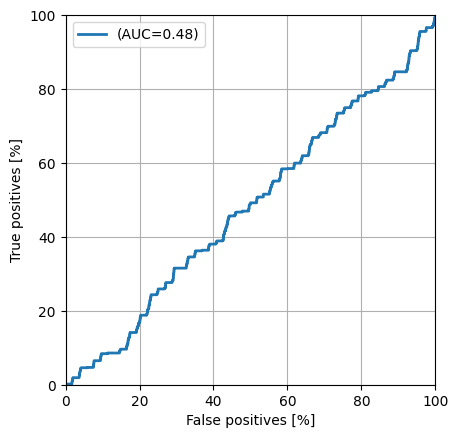

In [53]:
mortality_pred = result['mortality_outcome']['y_pred'][:, 1]
mortality_groundtruth = result['mortality_outcome']['y_true'][:, 0]
_plot_roc(mortality_groundtruth, mortality_pred)

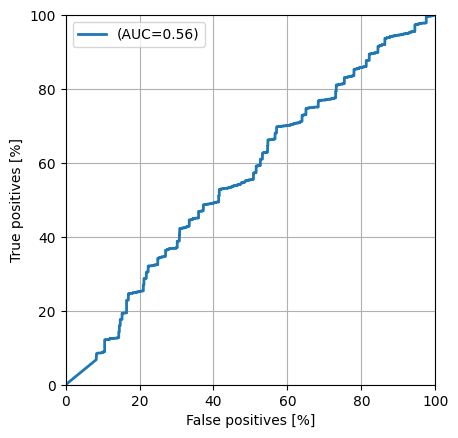

In [54]:
discharge_pred = result['discharge_outcome']['y_pred'][:, 1]
discharge_groundtruth = np.hstack(result['discharge_outcome']['y_true'])
_plot_roc(discharge_groundtruth, discharge_pred)